# **CLUSTERING ANALYSIS**

**Objective:**

    The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# Load the workbook
xls = pd.ExcelFile("EastWestAirlines.xlsx")

# Display sheet names
print("Sheet names:", xls.sheet_names)

# Try reading the second sheet (index 1)
df = pd.read_excel(xls, sheet_name=xls.sheet_names[1])

# Preview first few rows
df.head()


Sheet names: ['Description', 'data']


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


##**Data Preprocessing:**

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [120]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [121]:
# Checking for missing values
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [122]:
df.shape

(3999, 12)

In [123]:
from sklearn.preprocessing import StandardScaler

# Drop ID column
df_scaled = df.drop('ID#', axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)

# Convert back to a DataFrame for easier understanding
scaled_df = pd.DataFrame(scaled_data, columns=df_scaled.columns)

# Display first few rows
scaled_df.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


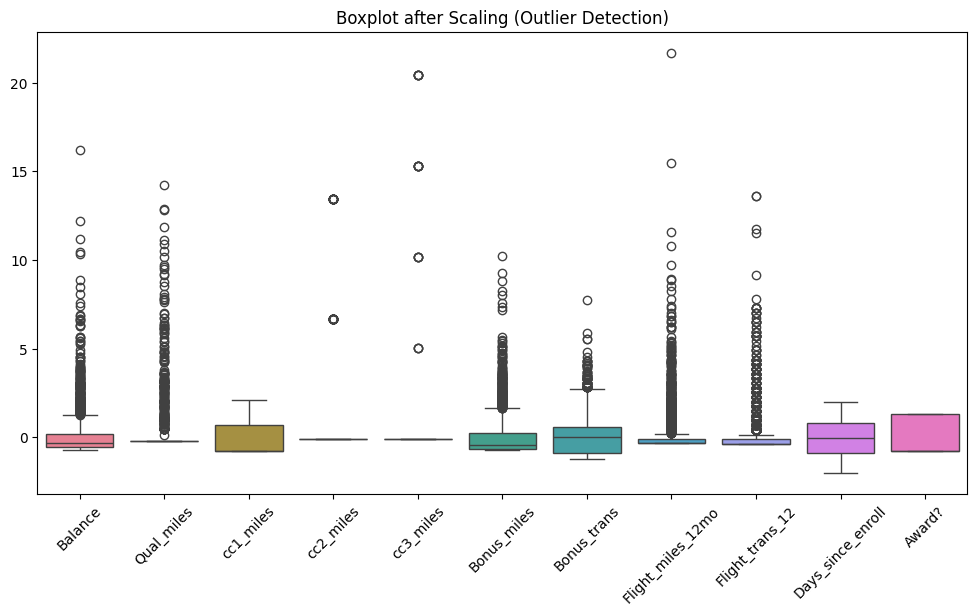

In [124]:
# Checking outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=scaled_df)
plt.title("Boxplot after Scaling (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()


## **Exploratory Data Analysis (EDA)**

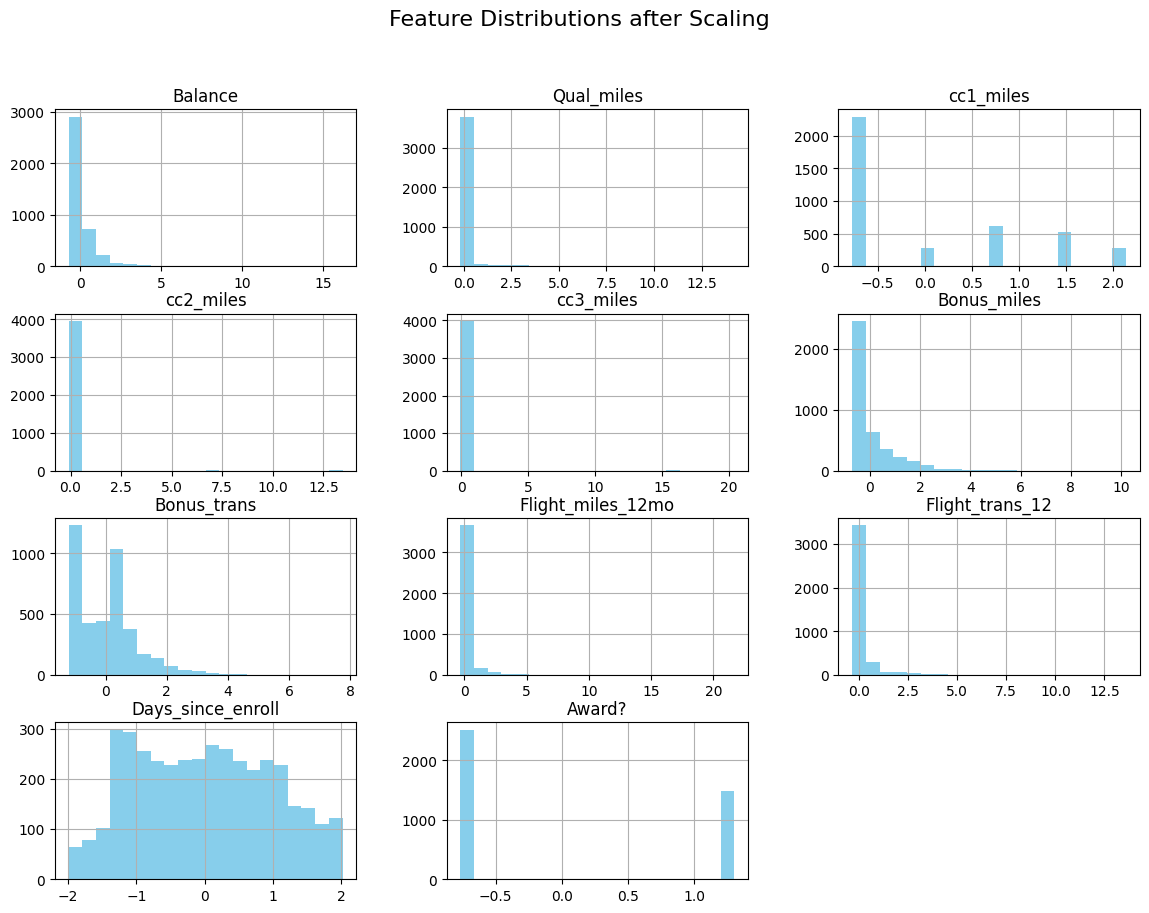

In [125]:
# Distribution of Features

scaled_df.hist(figsize=(14,10), bins=20, color='skyblue')
plt.suptitle("Feature Distributions after Scaling", fontsize=16)
plt.show()


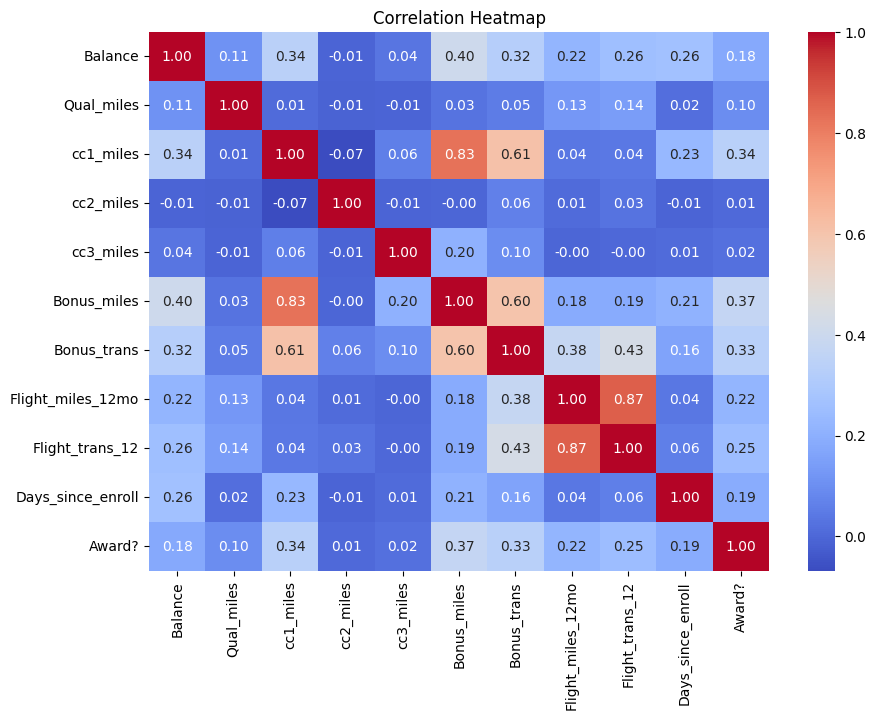

In [126]:
#Correlation Heatmap

plt.figure(figsize=(10,7))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


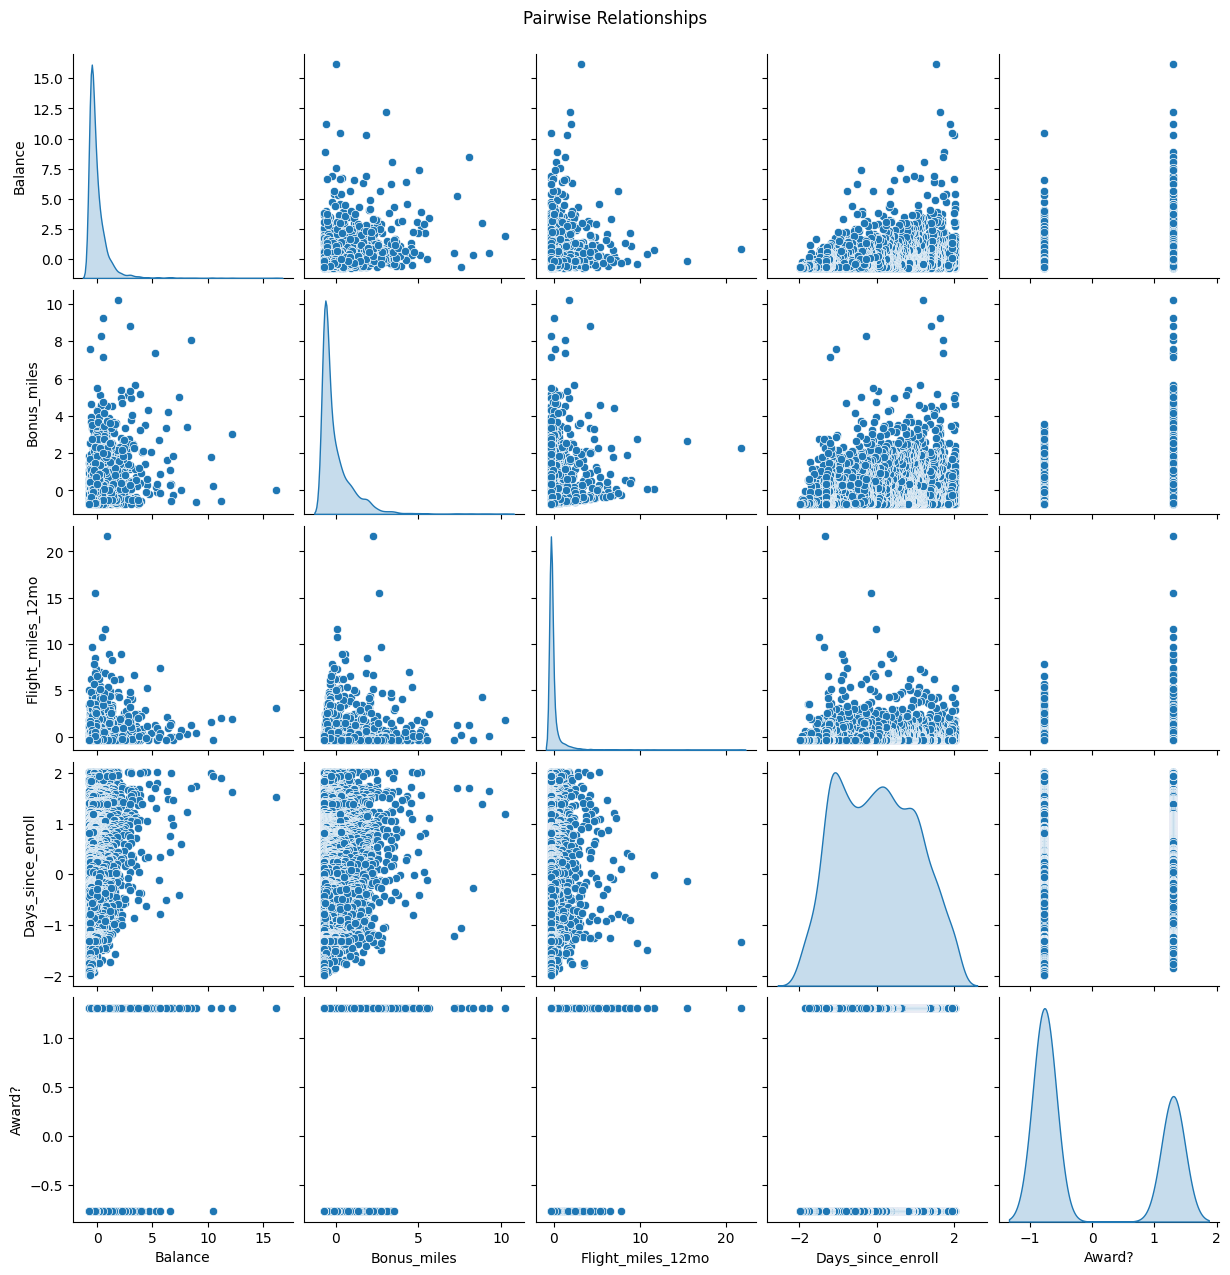

In [127]:
# Pairwise Relationship

sns.pairplot(scaled_df[['Balance','Bonus_miles','Flight_miles_12mo','Days_since_enroll','Award?']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


##**Implementing Clustering Algorithms:**

**kMeans**

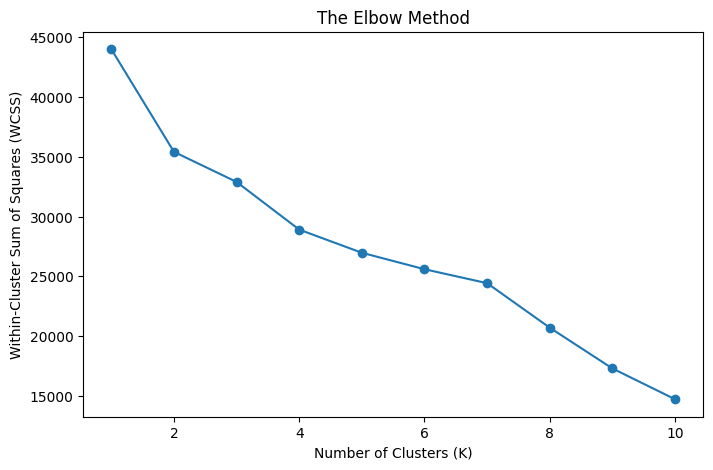

In [128]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

# Elbow Method using scaled data
fig = plt.figure(figsize=(8, 5))
WCSS = []

for i in range(1, 11):
    clf = KMeans(n_clusters=i, random_state=42)
    clf.fit(scaled_df)   # ✅ use scaled data
    WCSS.append(clf.inertia_)

plt.plot(range(1, 11), WCSS, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [129]:
WCSS

[43989.0000000001,
 35409.516629861384,
 32895.91101443956,
 28909.479400430573,
 26975.779233036978,
 25599.269402878585,
 24433.624445543217,
 20713.28456478714,
 17306.440055842464,
 14732.229882347445]

In [130]:
# Apply K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to original (unscaled) dataframe
df['Cluster'] = kmeans.labels_

# Check how many customers per cluster
print(df['Cluster'].value_counts())

# View sample rows from each cluster
df.groupby('Cluster').mean()


Cluster
3    1502
2    1236
1    1105
0     156
Name: count, dtype: int64


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,,
0,1750.333333,193291.147436,795.455128,2.179487,1.038462,1.000000,32292.288462,27.628205,5530.230769,16.211538,4688.070513,0.820513
1,1658.865158,122119.899548,151.724887,3.885068,1.002715,1.043439,43772.394570,19.398190,366.520362,1.087783,4777.394570,0.687783
2,1101.367314,59693.586570,112.733010,1.372168,1.031553,1.000809,6311.116505,8.456311,258.830097,0.806634,5744.810680,0.296117
3,3055.842210,36920.458056,96.690413,1.269640,1.006658,1.000000,4897.208389,6.790280,167.861518,0.509321,2236.466711,0.151132


K-Means Silhouette Score: 0.19071186813310886


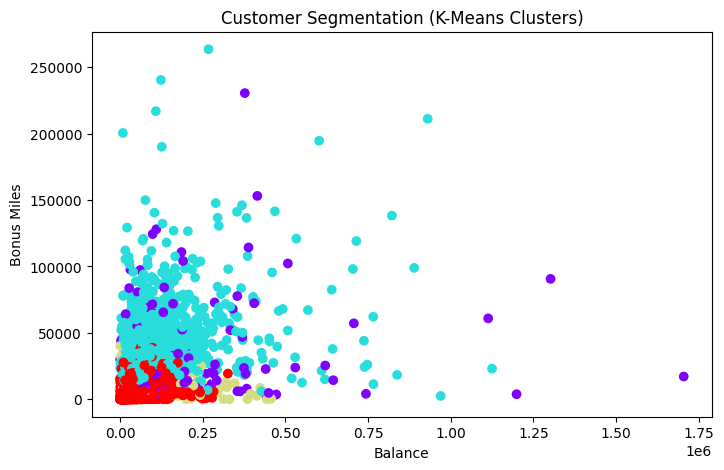

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Add cluster labels to original (unscaled) dataframe
df['KMeans_Cluster'] = kmeans.labels_

# Calculate Silhouette Score for K-Means
score_kmeans = silhouette_score(scaled_df, kmeans.labels_)
print(f"K-Means Silhouette Score: {score_kmeans}")

plt.figure(figsize=(8,5))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['KMeans_Cluster'], cmap='rainbow')
plt.title("Customer Segmentation (K-Means Clusters)")
plt.xlabel("Balance")
plt.ylabel("Bonus Miles")
plt.show()

###  **K-Means Clustering Insights**

1. **4 clusters** were identified using the Elbow method — showing distinct customer groups based on their flight and mileage behavior.
2. **Cluster 0** – High-value customers with **very high balance and flight miles**; likely loyal frequent flyers.
3. **Cluster 1** – Moderately active customers with **average balance and miles**, may be occasional travelers.
4. **Cluster 2** – **Low engagement customers** with minimal miles and transactions, possibly new or inactive members.
5. **Cluster 3** – Customers with **very high balance but fewer flights**, possibly those accumulating miles through credit cards or bonuses.


**Hierarchical Clustering**

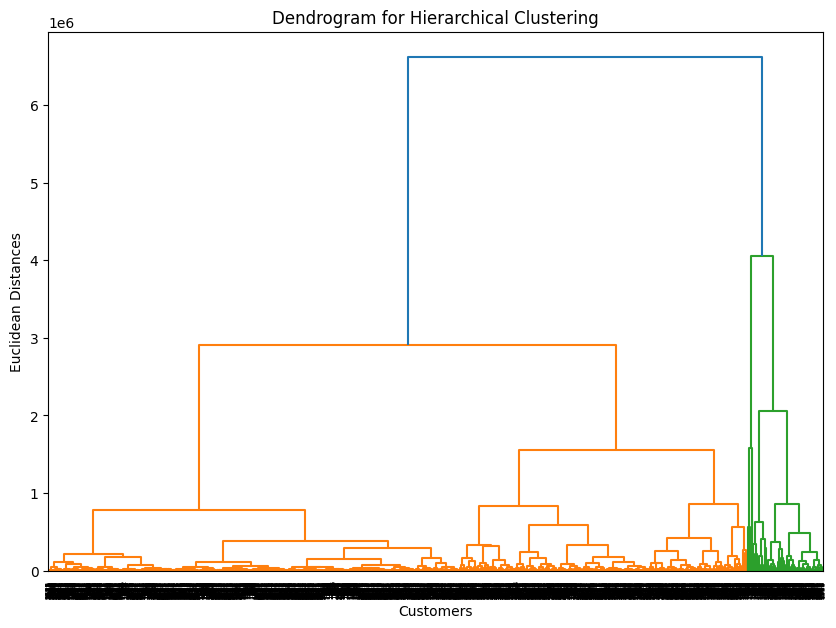

In [132]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Dendrogram to find optimal number of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


In [133]:
# Apply Agglomerative Clustering with 4 clusters
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df)

# Add cluster labels
df_hc = df.copy()
df_hc['Cluster'] = y_hc

Hierarchical Clustering Silhouette Score: 0.14617459862008392


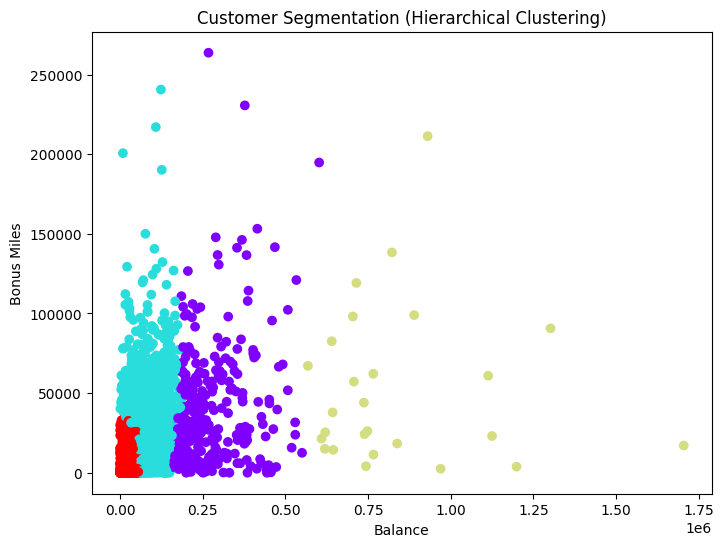

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Add cluster labels
df_hc['Hierarchical_Cluster'] = y_hc

# Calculate Silhouette Score for Hierarchical Clustering
score_hc = silhouette_score(scaled_df, y_hc)
print(f"Hierarchical Clustering Silhouette Score: {score_hc}")

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_hc['Balance'], df_hc['Bonus_miles'], c=y_hc, cmap='rainbow')
plt.title('Customer Segmentation (Hierarchical Clustering)')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

In [135]:
# View summary of clusters
cluster_summary = df_hc.groupby('Cluster').mean()
print(cluster_summary)

                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        1405.933884  259110.366391  378.903581   2.845730   1.013774   
1        1811.166667   87824.594086  148.344758   2.881720   1.008737   
2         869.769231  841016.769231  512.692308   3.346154   1.000000   
3        2275.814797   22490.675778   96.467955   1.332705   1.018850   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.000000  35730.862259    17.964187        1181.785124   
1         1.030914  29035.436828    15.500000         622.870968   
2         1.115385  52888.269231    22.346154        1797.807692   
3         1.000000   5189.496701     7.648445         206.032045   

         Flight_trans_12  Days_since_enroll    Award?  KMeans_Cluster  \
Cluster                                                                 
0     

### Hierarchical Clustering Insights (Short Version)

* **Cluster 0 – High-Value Frequent Flyers:** High balance and bonus miles with moderate flights; loyal customers worth premium offers.
* **Cluster 1 – Moderate Users:** Average balance and miles, occasional flyers; potential to increase engagement through rewards.
* **Cluster 2 – Elite / Corporate Flyers:** Very high balance and bonus miles, frequent flights; highly engaged, target for exclusive perks.
* **Cluster 3 – Low-Value / Inactive Customers:** Low balance and minimal flights; likely new or disengaged, need re-engagement campaigns.

**Overall:** Four clear customer segments are identified, which can guide targeted marketing and loyalty strategies.

**DBSCAN Clustering**

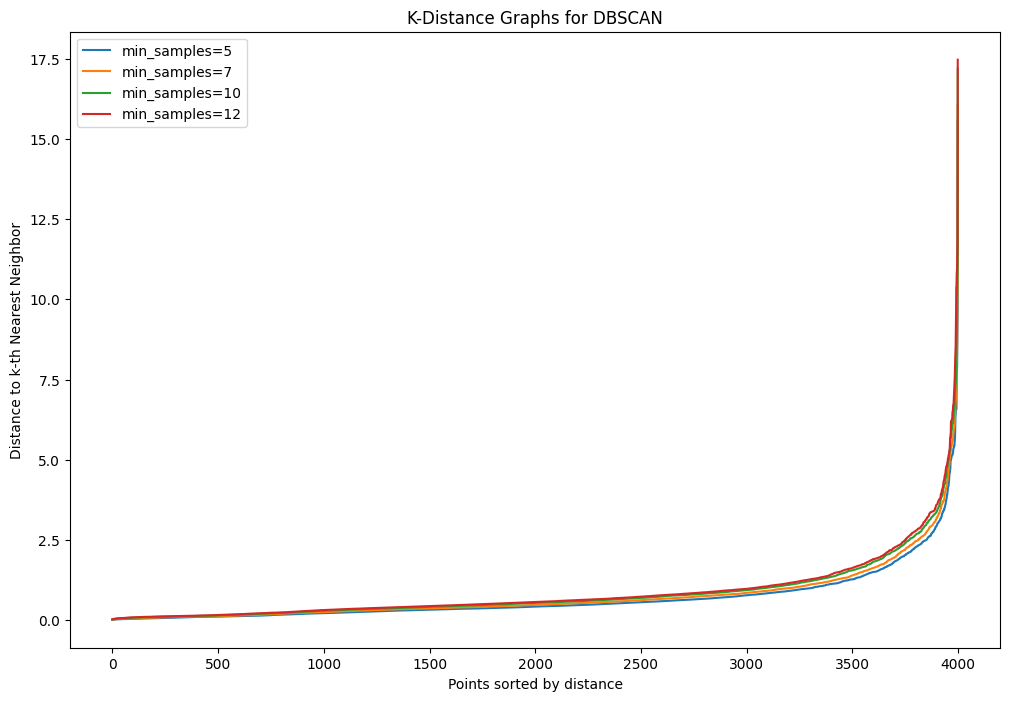

In [136]:
from sklearn.neighbors import NearestNeighbors

# Use scaled data for DBSCAN k-distance plot
X = scaled_df.values

# Choose a range of min_samples to test (common choices: 5 to 15)
min_samples_list = [5, 7, 10, 12]

# Plot K-distance graphs for each min_samples
plt.figure(figsize=(12, 8))
for min_samples in min_samples_list:
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, min_samples-1])
    plt.plot(distances, label=f'min_samples={min_samples}')

plt.title("K-Distance Graphs for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to k-th Nearest Neighbor")
plt.legend()
plt.show()


In [137]:
# Using your scaled DataFrame
num_features = scaled_df.shape[1]  # shape returns (rows, columns)
print("Number of features:", num_features)


Number of features: 11


In [138]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Use scaled data
X = scaled_df.values

# Initialize DBSCAN
# eps = distance threshold, min_samples = minimum points to form dense region
dbscan = DBSCAN(eps=2.2, min_samples=12)  # you can tune eps and min_samples
y_db = dbscan.fit_predict(X)

In [139]:
# Add cluster labels to original data
df_db = df.copy()
df_db['Cluster'] = y_db

# Check cluster distribution
print("DBSCAN Cluster Counts:")
print(df_db['Cluster'].value_counts())

DBSCAN Cluster Counts:
Cluster
 0    3767
-1     213
 1      19
Name: count, dtype: int64


In [140]:
from sklearn.metrics import silhouette_score

# Use scaled data
X = scaled_df.values

# Silhouette Score (ignore noise points labeled as -1)
mask = y_db != -1
score_dbscan = silhouette_score(X[mask], y_db[mask])
print(f"DBSCAN Silhouette Score: {score_dbscan}")

DBSCAN Silhouette Score: 0.5797505139461814


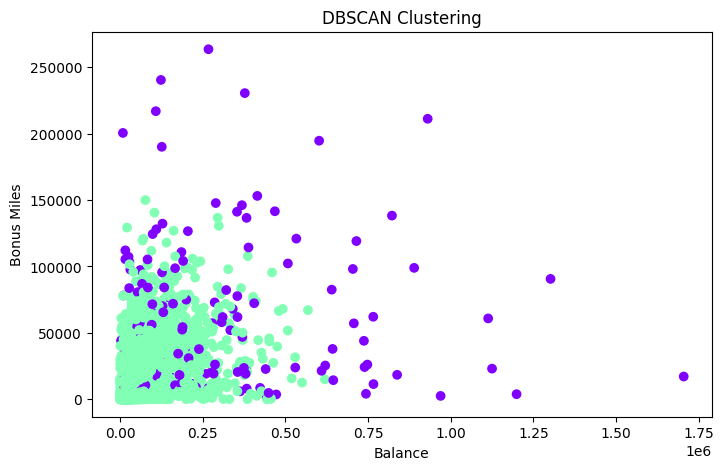

In [141]:
# Visualize clusters (example: Balance vs Bonus_miles)
plt.figure(figsize=(8,5))
plt.scatter(df_db['Balance'], df_db['Bonus_miles'], c=df_db['Cluster'], cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.xlabel("Balance")
plt.ylabel("Bonus Miles")
plt.show()


###  DBSCAN Clustering Insights

* **Cluster 0 (3767 customers)** – **Main segment**
  Most customers belong here. They have typical balances, miles, and engagement patterns — represent the core customer base.

* **Cluster 1 (19 customers)** – **Niche / High-value segment**
  Very small group. Likely premium, elite, or unusual customers with distinct behaviors (high balances or bonus miles).

* **Noise / Outliers (-1, 213 customers)** – **Irregular customers**
  Points that don’t fit into any cluster. Could be new, inactive, or highly irregular customers — useful for special attention or anomaly detection.

* **Silhouette Score (0.5797)** – **Good cluster separation**
  Clusters are fairly well-separated and compact, indicating meaningful grouping in customer behavior.

 **Actionable Insights**

* Focus loyalty programs on **Cluster 0** to retain the majority.
* Offer **exclusive perks** to Cluster 1 to maintain engagement.
* Investigate noise points for **potential new marketing or engagement strategies**.

#CONCLUSION:
### Clustering Analysis Summary

In this assignment, three clustering algorithms — **K-Means, Hierarchical Clustering, and DBSCAN** — were applied to the EastWest Airlines customer dataset to segment customers based on travel and reward behavior.

**1. K-Means Clustering:**

* Applied with K = 4 (based on Elbow Method).
* Clusters identified: High-value frequent flyers, moderate users, occasional flyers, and low-engagement customers.
* **Silhouette Score:** 0.191 → indicates moderate cluster separation, some overlap present.

**2. Hierarchical Clustering:**

* Agglomerative clustering with 4 clusters (Ward linkage).
* Dendrogram helped visualize customer groupings.
* **Silhouette Score:** 0.146 → low separation; clusters are not as distinct.

**3. DBSCAN:**

* Density-based clustering with `eps = 2.2` and `min_samples = 12`.
* Identified dense customer groups and outliers (-1 label).
* **Silhouette Score:** 0.580 → highest among the three methods, indicating well-separated and meaningful clusters.

**Insights:**

* **DBSCAN performed best** for this dataset, effectively capturing dense customer groups and identifying noise/outliers.
* K-Means and Hierarchical can still provide rough segmentation, but may miss subtle patterns.
* Cluster analysis can guide marketing strategies: reward loyal high-value flyers, engage low-activity customers, and target promotions based on cluster profiles.
